<div>
<img src="https://www.th-koeln.de/img/logo.svg" width="100">
</div>

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons Lizenzvertrag" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
<br />Dieses Werk ist lizenziert unter einer <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Namensnennung - Weitergabe unter gleichen Bedingungen 4.0 International Lizenz</a>.

Prof. Dr. Johanna Friederike May <br>
Technische Hochschule Köln <br>
Fakultät für Informations-, Medien- und Elektrotechnik (F07)<br>
Institut für Elektrische Energietechnik (IET)<br>
Cologne Institute for Renewable Energy (CIRE)<br>

# Systemtechnik für Energieeffizienz - Einführung

## python konfigurieren

### Module importieren

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns
import plotly
import plotly.graph_objects as go

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)

### Grafikparameter einstellen

In [3]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"
pd.set_option('display.latex.repr', True)
pd.set_option('display.latex.longtable', True)

- [ ] TODO am Anfang immer gleiche Layoutparameter und Module laden - überall anpassen

## Lernziele für diese Einheit

<div class="alert alert-block alert-info"><b>Lernziele für diese Einheit: </b>

- Sinn und Zweck des Moduls Systemtechnik für Energieeffizienz kennenlernen
- Vorteile von python für Energiedatenanalyse erkennen
- Reproducible Research mit Jupyter Notebooks kennenlernen
- Python installieren und nutzen auf dem eigenen Notebook
</div>

## Systematisch Energieeffizienz verbessern

### Minimal-Beispiel: Wasser kochen für eine Tasse Tee

- [ ] TODO Video verlinken

![Tasse Tee](../img/TasseTee.png)

**Systematische Vorgehensweise**:
1. Anforderungen definieren und strukturiert darstellen
2. Systemgrenzen (Schnittstellen, Bilanzstellen) festlegen
3. Einflussstärken von Effekten analysieren und Sensitivitäten ermitteln
4. (nicht nur) Technische Lösungen finden
5. Anhand der Anforderungen bewerten und auswählen

#### Anforderungen definieren

In [3]:
T_Wasser = 100 # °C
V_Wasser = 0.3 # l = dm³
print('Wasser', T_Wasser, '°C heiß')
print('Volumen', V_Wasser, ' l = ', V_Wasser, ' dm³')

Wasser 100 °C heiß
Volumen 0.3  l =  0.3  dm³


#### Systemgrenzen festlegen

In [4]:
T_Leitung = 10 # °C
V_Wasserkocher = 1.2 # l
P_Wasserkocher = 1e3 # W
print('Wasser aus der Leitung: ', T_Leitung, '°C')
print('Wasserkochervolumen: ', V_Wasserkocher, ' l')
print('Leistung Wasserkocher: ', P_Wasserkocher*1e-3, ' kW')

Wasser aus der Leitung:  10 °C
Wasserkochervolumen:  1.2  l
Leistung Wasserkocher:  1.0  kW


- [ ] TODO Energieflüsse neu zeichnen mit kleinen Bildern

![Systemgrenzen beim Wasserkochen](../img/systemgrenzenwasserkochen.png)

#### Effekte und deren Einflussstärken analysieren

![Einflüsse auf Energieverbrauch beim Teekochen](../img/einfluesse_tee.svg)

- [ ] TODO Effekte noch vervollständigen in draw.io Originaldatei

Energieverlust durch elektrisches Anschlusskabel abschätzen:

Text(0,0.5,'Energieverlust im Kabel \npro Kochvorgang [Wh]')

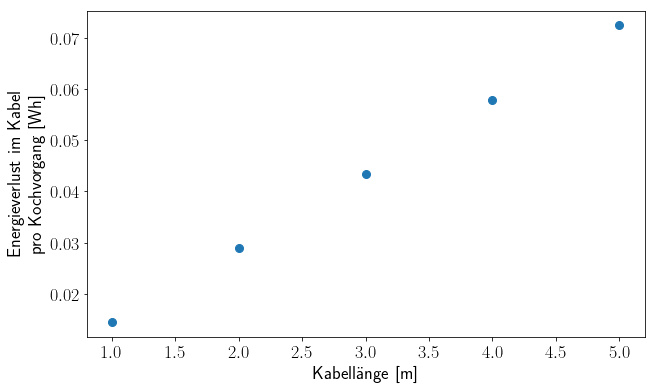

In [6]:
l = np.linspace(1,5,5) # typische Kabellänge in m
kappa = 58e6 # Leitfähigkeit von Kupfer in S/m
A = 1.5e-6 # typischer Kabelquerschnitt 1.5 mm³
R = (2/kappa)*l/A # Hin- und Rückleiter -> 2
PN = 1000 # Nennleistung
UN = 230 # Nennspannung
IN = PN/UN # Nennstrom
PV = R*IN**2 # Verlustleistung
tkoch = 2*60 # Kochdauer
EV = tkoch*PV # Energieverlust pro Kochvorgang
plt.plot(l,EV/3600,'o')
plt.xlabel(r'Kabell\"ange [m]')
plt.ylabel('Energieverlust im Kabel \npro Kochvorgang [Wh]')

ist das vernachlässigbar? auch für das lange Kabel?

mit der Heizenergie vergleichen:

Text(0,0.5,'Heizenergie ohne Verluste [Wh]')

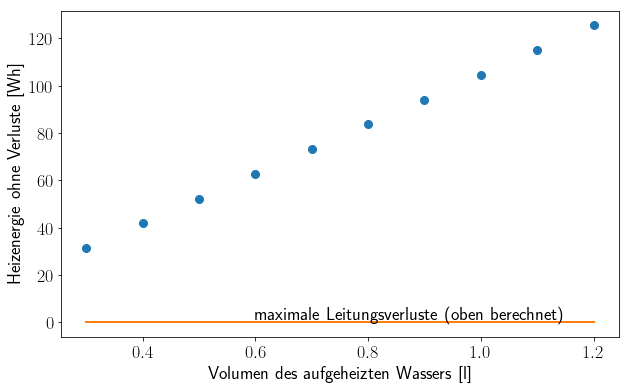

In [21]:
V = np.linspace(0.3,1.2,10)
rhoH2O = 1 # Dichte von Wasser ca. 1 kg/l
cH2O = 4182 # Wärmekapazität von Wasser in J/(kg K)
T1 = 10 # Anfangstemperatur
T2 = 100 # Endtemperatur
EH = V*rhoH2O*cH2O*(T2-T1) # Energieverbrauch fürs Aufheizen (mindestens, da ohne Verluste)
plt.plot(V,EH/3600,'o')
plt.plot(V,np.max(EV/3600)*np.ones(len(V)),'-')
plt.annotate('maximale Leitungsverluste (oben berechnet)',xy=(0.6,10*np.max(EV/3600)))
plt.xlabel('Volumen des aufgeheizten Wassers [l]')
plt.ylabel('Heizenergie ohne Verluste [Wh]')

In [36]:
print('Anteil Verluste an Heizenergie beim längsten Kabel: ' + str(np.round(100*np.max(EV)/np.min(EH),2)) + '%')

Anteil Verluste an Heizenergie beim längsten Kabel: 0.23%


In [37]:
if 100*np.max(EV)/np.min(EH) < 10:
    print('vernachlässigbar')
else:
     print('relevante Höhe: weiter untersuchen')   

vernachlässigbar


Anzahl der Tassen: 

In [41]:
print('Heizenergie für eine Tasse: ' +str(np.round(EH[0]/3600,1)) + ' Wh')
print('Heizenergie für zwei Tassen: ' + str(np.round(2*EH[0]/3600,1)) + ' Wh')

Heizenergie für eine Tasse: 31.4 Wh
Heizenergie für zwei Tassen: 62.7 Wh


zu viel Wasser im Kocher: direkt verschwendete Energie, relevanter Effekt

wenn 1 Minute später die nächste Tasse gebraucht wird, ist es dann besser, gleich zwei zu kochen? $\to$ Anforderungen verfeinern
<br>
und: Wärmeverluste abschätzen - oder **messen**

\cite{heinz-kill_physical_2019} hat dies getan:

Text(0,0.5,'Wirkungsgrad [\\%]')

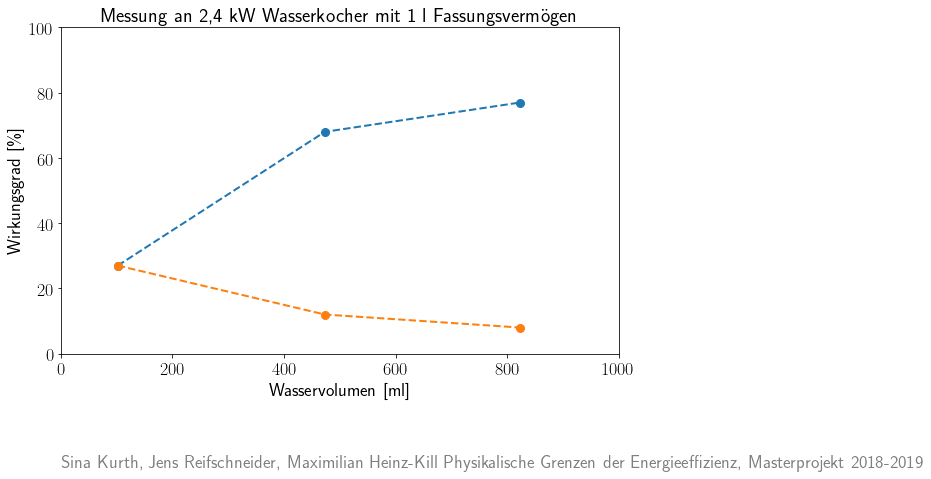

In [62]:
PNWK = 2400 # Nennleistung Wasserkocher 2.4 kW
VWK = 1 # 1 l Fassungsvermögen
mH2O = [102,473,823] # Masse des erhitzten Wassers in g
etagemessen = [27,68,77] # Wirkungsgrad bezogen auf reine für Aufheizen nötige Energie
eta102 = [27,12,8] # bezogen auf 102 g Wasser, Rest umsonst
plt.plot(mH2O,etagemessen,'o--',label='Wirkungsgrad')
plt.plot(mH2O,eta102,'o--',label='Wirkungsgrad für 102 g')
plt.text(0,-35,r'Sina Kurth, Jens Reifschneider, Maximilian Heinz-Kill Physikalische Grenzen der Energieeffizienz, Masterprojekt 2018-2019',color='gray')
plt.title(r'Messung an 2,4 kW Wasserkocher mit 1 l Fassungsverm\"ogen')
plt.axis([0,1000,0,100])
plt.xlabel('Wasservolumen [ml]')
plt.ylabel('Wirkungsgrad [\%]')

#### Technische (und andere) Lösungen finden

1. Wasserkocher in Tassengröße
2. Wasserkocher nur mit jeweiliger Bedarfsmenge gefüllt betreiben
3. Thermische Isolierung des Wasserkochers verstärken
4. Feste Zeiten für heißes Wasser einführen
5. Wasser nur auf 80°C erhitzen
6. ...

#### Lösungen bewerten

anhand ggf. versteckter (bisher übersehener) Anforderungen:
1. Wasserkocher in Tassengröße $\to$ *Kocher soll 1-4 Tassen können*
2. Wasserkocher nur mit jeweiliger Bedarfsmenge gefüllt betreiben $\to$ *Nutzen/Kosten einer Skala*?
3. Thermische Isolierung des Wasserkochers verstärken $\to$ *Nutzen/Kosten der thermischen Isolierung?*
4. Feste Zeiten für heißes Wasser einführen $\to$ *Nutzer arbeiten Gleitzeit*
5. Wasser nur auf 80°C erhitzen $\to$ *Hygiene: 100°C!*
6. ...

nach Quantifizierung von Kosten und Nutzen ggf. Maßnahmen 2 und 3 empfehlen

### Prozess im Überblick: iterativ und rekursiv

![je mehr man lernt, desto besser kann man Anforderungen definieren](../img/SYEmethodeniterieren.png)

- [ ] TODO neu zeichnen

- [ ] TODO relevante Norm(en) nennen

Dieses Dokument ist ein jupyter Notebook. Markdown formatiert Textblöcke. Wie Markdown geht, zeigt der folgende Link \cite{hannan_satopay_ultimate_2019} und werden Sie auch im Kurs lernen: 

https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd

*Wer noch mehr Funktionen nutzen möchte als jupyter kann und nicht vor einem ungewöhnlichen Editor zurückschreckt, kann den emacs Editor mit org-mode verwenden. Dort gibt es einen Modus, der sich org-babel nennt. Mit dem emacs Editor erstelle ich Skripte in LaTeX, die auch python-Grafiken enthalten. Man kann auswählen, welche Blöcke für das Skript oder eine Veröffentlichung exportiert werden und umfangreiche Layout-Einstellungen vornehmen (wie in LaTeX). Und es gibt sogar einen Modus, in dem man Jupyter Notebooks mit emacs exportieren kann (den habe ich allerdings noch nicht geknackt, weshalb diese Notebooks direkt im Jupyter Editor entstehen). Ein ziemlich gutes und umfangreiches Tutorial findet sich (auf französisch und auf englisch) bei [INRIA](https://learninglab.inria.fr/en/mooc-recherche-reproductible-principes-methodologiques-pour-une-science-transparente/).*

Bibliotheken für Jupyter importiert man am besten ganz oben, damit man alle da hat, die man benötigt.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
import numpy as np
import seaborn as sns
import pandas as pd

Grafikparameter für die Diagramme festlegen:

In [ ]:
linw = 2 # Linienbreite
lincol = 'orange' # Linienfarbe
lincol2 = 'red'
rcParams['font.family'] = 'sans-serif' # serifenfreie Schrift in Abbildungen
rcParams['font.size'] = 16 # Schriftgröße

## Wozu es das Modul Systemtechnik für Energieeffizienz (SYE) gibt

<div class="alert alert-block alert-info"><b>Lernziele für das Modul oder was ein*e Absolvent*in des Moduls SYE kann: </b>

- bestehende oder zukünftige Systeme aus Verbrauchern und Erzeugern analysieren, daraus Maßnahmen zur Verbesserung der systemischen Energieeffizienz ableiten und diese bewerten
- mit Messungen, Simulationen / Berechnungen in python und Methoden der Systemtechnik (Anforderungsanalyse, Einfluss-Stärken-Analyse, Kreativitätsmethoden) sowie nachvollziehbarer Dokumentation in einem jupyter notebook
- um als Ingenieur*in im Beruf mit vertretbarem Aufwand Optionen zur energetischen Optimierung von komplexen Systemen (technische Produkte über den Lebenszyklus, Fertigungsverfahren, batteriebetriebene Systeme) zu bewerten
</div>

![Inhaltliche Struktur SYE](./img/SYEstruktur.png)

![Zusammenhang von Nutzungslastprofil und Herstellenergie / Lebensdauer](./img/sye-energylabel.png)

### Wozu Energieeffizienz? Stimmen Sie ab!

**These A  \cite{gabriel_grunbuch_2016}**
<br><br>
*”[...] Energie, die wir einsparen, müssen wir nicht erzeugen, speichern und transportieren. So können
wir durch Energieeffizienz die Kosten der Dekarbonisierung unserer Wirtschaft senken. Und: man muss
die eingesparte Energie nicht bezahlen. [...]”*
<br><br>
**These B \cite{poppe_rebound-effekt_2013}**<br>
*”[...] Bisher wird in der Forschung weitestgehend davon ausgegangen, dass Rebound-Effekte nicht-intendierte Seiteneffekte von Effizienzmaßnahmen darstellen. Das ist jedoch nur die Hälfte der Wahrheit [...]”*

Der folgende Code ist inspiriert von [einem python excel Tutorial](https://pythonbasics.org/read-excel/) \cite{pythonbasicsorg_read_2020}

### Weniger $CO_2$ emittieren!

In [ ]:
# Daten einlesen aus Internetquelle
EUenergydata2020 = pd.read_excel('https://ec.europa.eu/energy/sites/ener/files/energy_statistical_countrydatasheets.xlsx',sheet_name=2)
EUenergydata2020.columns = EUenergydata2020.iloc[6] # Jahreszahlen als Spaltentitel
EUenergydata2020GDP2015 = EUenergydata2020.iloc[540,3:] # Bruttoinlandsprodukt
EUenergydata2020GHG = EUenergydata2020.iloc[495,3:] # Treibhausgase
EUenergydata2020Mtoe = EUenergydata2020.iloc[403,3:] # Energieverbrauch
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(1e-3*EUenergydata2020GDP2015,label='Bruttoinlandsprodukt 2015 Marktwert [Bio. €]')
ax.plot(1e-3*EUenergydata2020GHG,label='Treibhausgasemissionen [Mia. t $CO_2$]')
ax.plot(0.011630*EUenergydata2020Mtoe,label='Energieverbrauch [PWh]')
#ax.title('Motivation Klimaschutz: weniger $CO_2$!')
ax.text(2020,5,'Quelle: EU Energy in Figures Statistical Pocketbook 2020',color='gray')
ax.axis([1990,2018,0,25])
box = ax.get_position() # um Legende außerhalb zu machen, einige Tricks
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left',bbox_to_anchor=(1,0.5))

### Beispiel für die Umsetzung von Umwelt- und Klimaschutz an der TH Köln: Beschaffungsrichtlinien

![TH Verwaltung schreibt energieeffiziente Geräte vor](./img/THvorschriftenergieeffizienz.png)

### Energie sparen bedeutet (nicht immer) Kosten sparen

Beispiel: [Energiespartipps für das HomeOffice von der Verbraucherzentrale](https://verbraucherzentrale-energieberatung.de/energie-sparen/energie-sparen-im-homeoffice/) \cite{verbraucherzentrale_energie_2020}

![Deutschlands Energieproduktivität steigt](http://wiki.energytransition.org/files/2018/10/BL_ET_update_2018_Germany-continues-to-produce-more-GDP-with-less-energy-.png)

### Nationaler Aktionsplan Energieeffizienz

die [*Elektrische Energieeffizienz Deutsche Normungs-Roadmap Version 2*, VDE 2018](https://www.dke.de/resource/blob/950182/9d6b9b67cf0c967fb1e7d9e417c009e0/nr-energieeffizienz-v2-de-data.pdf) \cite{vde_verband_der_elektrotechnik_elektronik_informationstechnik_e_v_als_trager_der_elektronik_informationstechnik_in_din_und_vde_elektrische_2018} fasst zusammen:
- Abhängigkeit von Energieimporten vermindern
- statt Verzicht intelligenter und sparsamer mit Energie umgehen
- bis 2050
 - Stromverbrauch um 10-25% (bezogen auf 2008) senken
 - Verkehrsenergieverbrauch um 40% (bezogen auf 2005) senken
 - Gebäude: Primärenergiebedarf um 80% bis 2050 senken

### Potenziale im Gebäudesektor

![sehr große Potenziale im Gebäudesektor!](https://wiki.energytransition.org/files/2018/10/BL_ET_update_2018_The-housing-sector-offers-large-potential-for-energy-savings--1024x787.png)

### Kraft-Wärme-Kopplung - am besten erneuerbar!

![Potenziale der Kraft-Wärme-Kopplung](https://wiki.energytransition.org/files/2019/01/BL_ET_update_2018_Why-cogeneration-is-more-efficient-than-conventional-coal-power-plants--1024x787.png)

### Standby-Verbrauch und Ökodesign

die [*Elektrische Energieeffizienz Deutsche Normungs-Roadmap Version 2*, VDE 2018](https://www.dke.de/resource/blob/950182/9d6b9b67cf0c967fb1e7d9e417c009e0/nr-energieeffizienz-v2-de-data.pdf) \cite{vde_verband_der_elektrotechnik_elektronik_informationstechnik_e_v_als_trager_der_elektronik_informationstechnik_in_din_und_vde_elektrische_2018} nennt die **Ökodesign-Richtlinie** als Mittel gegen Standby-Verbräuche:
- zwischen 2004 und 2006 ca. 4% des Bruttostromverbrauchs
- Ökodesign-Richtlinie (Verordnung 1275/2008) begrenzt Standby auf 0,5 W bzw. 1 W
- allerdings gilt die Richtlinie nicht für alle Verbraucher

### Energieeffiziente Elektromotoren in der Industrie, inzwischen auch IE4

die [COMMISSION  REGULATION  (EC)  No  640/2009of  22  July  2009implementing  Directive  2005/32/EC  of  the  European  Parliament  and  of  the  Council  with  regard  to  ecodesign  requirements  for  electric  motors](https://eur-lex.europa.eu/LexUriServ/LexUriServ.do?uri=OJ:L:2009:191:0026:0034:EN:PDF) \cite{european_commission_commission_2009} lässt sich leider nicht automatisiert auslesen (pdf) - wenn man sich das Abtippen sparen will, kann man so eine Tabelle allerdings in ein Tabellenkalkulationsprogramm hineinkopieren, als csv speichern und dann weiterverarbeiten, und reduziert so die Tippfehler

In [ ]:
RatedOutputPowerkW = [0.75, 1.1, 1.5, 2.2, 3, 4, 5.5, 7.5, 11, 15, 18.5, 22, 30, 37, 45, 55, 75, 90, 110, 132, 160, 375]
IE2mineta2pole = [77.4,79.6,81.3,83.2,84.6,85.8,87,88.1,89.4,90.3,90.9,91.3,92,92.5,92.9,93.2,93.8,94.1,94.3,94.6,94.8,95]
IE2mineta4pole = [79.6,81.4,82.8,84.3,85.5,86.6,87.7,88.7,89.8,90.6,91.2,91.6,92.3,92.7,93.1,93.5,94,94.2,94.5,94.7,94.9,95.1]
IE2mineta6pole = [75.9,78.1,79.8,81.8,83.3,84.6,86,87.2,88.7,89.7,90.4,90.9,91.7,92.2,92.7,93.1,93.7,94,94.3,94.6,94.8,95]
plt.plot(RatedOutputPowerkW,IE2mineta2pole,label='$\eta$ IE2 2-polig')
plt.plot(RatedOutputPowerkW,IE2mineta4pole,label='$\eta$ IE2 4-polig')
plt.plot(RatedOutputPowerkW,IE2mineta6pole,label='$\eta$ IE2 6-polig')
plt.legend()
plt.xlabel('Nennleistung [kW]')
plt.ylabel('%')
plt.text(200,87,'Quelle:\nCOMMISSION\nREGULATION\n(EC)  No  640/2009',color='gray')

### Energieeffizienz in Europa

die [*Elektrische Energieeffizienz Deutsche Normungs-Roadmap Version 2*, VDE 2018](https://www.dke.de/resource/blob/950182/9d6b9b67cf0c967fb1e7d9e417c009e0/nr-energieeffizienz-v2-de-data.pdf) \cite{vde_verband_der_elektrotechnik_elektronik_informationstechnik_e_v_als_trager_der_elektronik_informationstechnik_in_din_und_vde_elektrische_2018} nennt folgende
<br><br>
Rechtsakte:
- Ökodesign
- Energieverbrauchskennzeichnung
- Gebäudebereich
<br><br>
Richtlinien:
- Richtlinie EDL-RL 2006: Endenergieverbrauch in EU reduzieren und Markt für Energiedienstleistungen fördern
- Energieeffizienzrichtlinie 2012:
 - jährliche Einsparverpflichtung 1,5% bzw. alternativ politische Maßnahmen mit gleicher Wirkung
 - jährliche Sanierungsverpflichtung 3% der Bundesgebäude
 - Einführung indikativer nationaler Energieeffizienzziele
 - Förderung / Verpflichtung zu Energieaudits, Verbrauchsmessung und -abrechnung, Kraft-Wärme-Kopplung, u.v.m.

### In Breakout-Rooms diskutieren

1. Wann haben Sie das letzte Mal ein Produkt oder eine Dienstleistung gekauft, hauptsächlich deswegen, weil Sie sich davon mehr Energieeffizienz versprochen haben?
2. Wie hoch ist Ihr jährlicher Stromverbrauch?
3. Welchen Spritverbrauch hat Ihr Auto?
4. Welche Energieeffizienzklasse hat Ihre Waschmaschine?
5. Wie verringern Sie Ihren Energieverbrauch?

<div class="alert alert-block alert-info"><b>Tipp: </b>
Weiterführendes Interview zu Energieeffizienz (podcast): <a href="https://www.enpower-podcast.de/podcast/05-energieeffizienz-dr-clemens-rohde">enPower - Der Energiewende Podcast: #05 Energieeffizienz - Dr. Clemens Rohde</a> \cite{julius_wesche_05_2020}
</div>

### Energieeffizienz ist kein Selbstzweck

![Gründe dafür](./img/energieeffizienz-kein-selbstzweck.png)

## Wozu **Systemtechnik** für Energieeffizienz?

*„10% kann man holen mit den Energieeffizienzklassen, viel mehr mit Systemanalyse, aber schwieriger, da man das nicht im Katalog auswählen kann und mehr Know-How nötig ist“*
<br>
ECPE Kongress 2016, Diskussionsrunde „Energieeffiziente Antriebe in der Industrie“

### System-Beispiele diskutieren

Sammeln Sie: wann ergibt sich trotz hoher Einzeleffizienzen eine schlechte Gesamteffizienz?

### Systemtechnik: Methoden, um systematisch mit Komplexität umzugehen

![Wald vor lauter Bäumen](./img/SYEwald.png)

## Warum python?

### Weit verbreitet und open source ...

![](https://cdn.statcdn.com/Infographic/images/normal/22669.jpeg)

Wo kommt dieses Bild her? 

*Mit Doppelklick im Jupyter Notebook auf das Bild erhält man den Link.*

### Top Datenanalyse Tool

Python ist seit einigen Jahren ganz vorne, wie man am verlinkten Video sieht (Ton aus reicht, ist nur mit Musik hinterlegt): 
https://youtu.be/pKPaHH7hnv8

### Energiesystem-Simulation auch in python möglich

Python beinhaltet mittlerweile viele Pakete zur Energiesystem-Simulation, hier zwei Beispiele: 

![](https://pvlib-python.readthedocs.io/en/stable/_images/pvlib_logo_horiz.png) PVLIB \cite{f_holmgren_pvlib_2018}

![](https://www.ei.tum.de/fileadmin/_processed_/a/a/csm_SimSES_Structure_daee11cf03.png) SIMSES (TU München) \cite{naumann_simses_2017}

D.h. man kann dann mit python nicht nur Daten einlesen und analysieren (mit Datenanalyse), sondern auch welche generieren mithilfe von Energiesimulationen. Beides zusammen hilft dann dabei, Potenziale für Energieeffizienz zu finden.

<div class="alert alert-block alert-success"><b>Python ist gut für Data Science und Energiesystemsimulation.</div>

## Jupyter Notebooks?

In [ ]:
2+2

Jupyter Notebooks sind interaktiv. Klicken Sie in das Fenster mit der Rechnung, ändern Sie die Zahlen und drücken Sie dann Shift+Enter oder oben im Menü Run. Probieren Sie auch andere Rechnungen aus.

In [ ]:
print('Hallo!')

Man kann also auch bestimmte Dinge ausgeben, wie in anderen Programmiersprachen. Das ist natürlich im Beispiel nicht so spannend. Da hätte man auch gleich in Markdown schreiben können...

In [ ]:
a = 2
b = 2
print(a+b)

Man kann also in einer Codezelle etwas berechnen und das Ergebnis dann ausgeben.

Wozu ist das gut?

Wir nehmen mal an, wir haben eine Reihe von Daten gemessen: Die Viertelstundenmittelwerte der Leistung eines bestimmten Haushalts betragen an 10 aufeinanderfolgenden Messzeitpunkten 3 kW, 8 kW, 9 kW, 10 kW, 2 kW, 1 kW, 4 kW, 9 kW, 1 kW, 1 kW. Die Daten wurden in einer Exceltabelle notiert und für den Bericht nun abgetippt in Word. 

Nach etlichen Wochen der Beschäftigung mit dem Thema stellen wir fest, dass der Messpunkt 2 falsch ist: Es sind nicht 8 kW, sondern nur 3 kW. Nun ändern wir das natürlich in der Excel-Tabelle. Der Word-Bericht wird aber vergessen und es gibt keine automatische Verlinkung. Im Word-Bericht steht nun also die falsche Zahl.

In Jupyter Notebook könnten wir die Daten einlesen (dazu später, wie das geht). Hier geben wir die Daten in einer Variable ein.

In [ ]:
p = [3,3,9,10,2,1,4,9,1,1] # Leistung in kW

Nun können wir die Variable p im Jupyter Notebook unterhalb der Definition immer wieder verwenden. Man muss also **nur an dieser einen Stelle** den Wert ändern und kann dann folgerichtig (ohne Folgefehler) damit weiterarbeiten.

In [ ]:
print('Leistung zum Zeitpunkt 3: ',str(p[2]),'kW')

Ändern Sie in der Definitionszeile einzelne Werte in p. Führen Sie dann zur Übertragung in der Variable erneut die Zelle aus (mit Shift-Enter). Probieren Sie dann, was der print-Befehl ausgibt. 

Es wird also wahrscheinlicher, dass keine Copy-Paste-Fehler bei der Übertragung von Daten passieren und dass Fehler in den Daten dadurch besser auffallen.

<div class="alert alert-block alert-success"><b>Reproducible Research: </b> Mit Jupyter Notebooks kann man nachvollziehbar und reproduzierbar gleichzeitig analysieren und auch schon leserlich dokumentieren.</div>

### Kopfstand-Brainstorming

In Breakout-Rooms: Was können Sie alles tun, um zu *vermeiden*, dass Ihre Dokumentation im Projekt dieses Semester nachvollziehbar wird?

## Python auf dem eigenen Rechner?

### Python

![](https://upload.wikimedia.org/wikipedia/en/c/cd/Anaconda_Logo.png) *By Source (WP:NFCC#4), Fair use, https://en.wikipedia.org/w/index.php?curid=45351436*

Unter Windows am einfachsten: Anaconda installieren: https://www.anaconda.com/products/individual

Anaconda gibt es auch für Mac und Linux. Allerdings haben diese häufig bereits vorinstalliertes python. Ich benutze unter linux opensuse leap 15.2 die vorinstallierte python Version und komme damit gut zurecht.

<div class="alert alert-block alert-warning"><b>Wichtig: Python 3! </b>Aus Kompatibilitätsgründen gibt es auch immer noch Python 2 zum Herunterladen. Aber mit Python 3 hat sich vieles geändert und wir arbeiten im Kurs <b>nur</b> mit Python 3. Bitte achten Sie also darauf, dass die Version stimmt.</div>

### Jupyter

Anaconda bringt jupyter schon mit. Das Symbol sieht so aus: 

<a title="Cameron Oelsen / BSD (http://opensource.org/licenses/bsd-license.php)" href="https://commons.wikimedia.org/wiki/File:Jupyter_logo.svg"><img width="32" alt="Jupyter logo" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/32px-Jupyter_logo.svg.png"></a>

In Windows startet man einen lokalen jupyter Server mit dem Klick auf das Symbol. In Linux verwende ich gerne die Konsole und gebe den Befehl <p style="background:black">
<code style="background:black;color:white">jupyter notebook
</code>
</p> ein, sinnvollerweise in dem Verzeichnis, in dem alle relevanten Dateien liegen, beispielsweise das vorliegende Notebook.

Nun können Sie dieses vorliegende Notebook (eine Datei mit der Endung .ipynb) öffnen und es interaktiv verwenden, d.h. alle Zellen sind editierbar und die Code-Zellen sind auch ausführbar. Außerdem können Sie neue Zellen hinzufügen.

<div class="alert alert-block alert-success"><b>Sie haben jetzt also das erste Jupyter Notebook auf Ihrem Rechner geöffnet und interaktiv verwendet! </b></div>

## Überblick über Inhalte des Moduls Systemtechnik für Energieeffizienz

## Literatur

wie man Literatur automatisiert einfügt: 
- oben auf den Schraubenschlüssel klicken
- dann im Feld die Datei mit den Literaturverzeichnis-Daten im bibtex-Format eintragen (hier: SYE.bib)
- Datei einfach im Home von Jupyter erstellen
- Literatur-Angaben aus zotero oder citavi dort im bibtex-Format hineinkopieren
- Tipp: zotero und citavi haben Browser-Plugins, mit denen sich viel Abtipparbeit sparen lässt, außerdem können sie ISBN-Nummern und DOI aus Datenbanken ziehen

## Zusammenfassung

- Was haben Sie heute gelernt?
- Welche Fragen sind noch offen?

# References

(<a id="cit-heinz-kill_physical_2019" href="#call-heinz-kill_physical_2019">Heinz-Kill, Kurth <em>et al.</em>, 2019</a>) Maximilian Heinz-Kill, Sina Kurth and Jens Reifschneider, ``_Physical limits of a electric kettle_'',  2019.

(<a id="cit-gabriel_grunbuch_2016" href="#call-gabriel_grunbuch_2016">Gabriel, 2016</a>) Sigmar Gabriel, ``_Grünbuch Energieeffizienz_'',  2016.  [online](https://www.bmwi.de/Redaktion/DE/Publikationen/Energie/gruenbuch-energieffizienz-august-2016.html)

(<a id="cit-poppe_rebound-effekt_2013" href="#call-poppe_rebound-effekt_2013">Poppe, 2013</a>) Erik Poppe, ``_Der Rebound-Effekt. Herausforderung für die Umweltpolitik. Masterarbeit._'',  2013.  [online](https://refubium.fu-berlin.de/bitstream/handle/fub188/14269/Erik_Poppe_Rebound_Effekt_Herausforderung_fuer_die_Umweltpolitik_2013.pdf)

(<a id="cit-pythonbasicsorg_read_2020" href="#call-pythonbasicsorg_read_2020">pythonbasics.org, 2020</a>)  pythonbasics.org, ``_Read Excel with Python Pandas - Python Tutorial_'',  2020.  [online](https://pythonbasics.org/read-excel/)

(<a id="cit-verbraucherzentrale_energie_2020" href="#call-verbraucherzentrale_energie_2020">Verbraucherzentrale, 2020</a>)  Verbraucherzentrale, ``_Energie sparen im Homeoffice_'',  2020.  [online](https://verbraucherzentrale-energieberatung.de/energie-sparen/energie-sparen-im-homeoffice/)

(<a id="cit-vde_verband_der_elektrotechnik_elektronik_informationstechnik_e_v_als_trager_der_elektronik_informationstechnik_in_din_und_vde_elektrische_2018" href="#call-vde_verband_der_elektrotechnik_elektronik_informationstechnik_e_v_als_trager_der_elektronik_informationstechnik_in_din_und_vde_elektrische_2018">VDE VERBAND DER ELEKTROTECHNIK ELEKTRONIK INFORMATIONSTECHNIK e. V. als Träger der Elektronik Informationstechnik in DIN und VDE, 2018</a>)  VDE VERBAND DER ELEKTROTECHNIK ELEKTRONIK INFORMATIONSTECHNIK e. V. als Träger der Elektronik Informationstechnik in DIN und VDE, ``_Elektrische Energieeffizienz Deutsche Normungs-Roadmap Version 2_'',  2018.  [online](https://www.dke.de/resource/blob/950182/9d6b9b67cf0c967fb1e7d9e417c009e0/nr-energieeffizienz-v2-de-data.pdf)

(<a id="cit-european_commission_commission_2009" href="#call-european_commission_commission_2009">European Commission, 2009</a>)  European Commission, ``_Commission Regulation (EC) No 640/2009 of 22 July 2009 implementing Directive 2005/32/EC of the European Parliament and of the Council with regard to ecodesign requirements for electric motorsText with EEA relevance_'',  2009.  [online](https://eur-lex.europa.eu/LexUriServ/LexUriServ.do?uri=OJ:L:2009:191:0026:0034:EN:PDF)

(<a id="cit-julius_wesche_05_2020" href="#call-julius_wesche_05_2020">Julius Wesche} and {Markus Fritz, 2020</a>)  Julius Wesche} and {Markus Fritz, ``_\#05 Energieeffizienz - Dr. Clemens Rohde — enPower Energiewende Podcast_'',  2020.  [online](https://www.enpower-podcast.de/podcast/05-energieeffizienz-dr-clemens-rohde)

(<a id="cit-f_holmgren_pvlib_2018" href="#call-f_holmgren_pvlib_2018">F. Holmgren, W. Hansen <em>et al.</em>, 2018</a>) F. Holmgren William, W. Hansen Clifford and A. Mikofski Mark, ``_pvlib python: a python package for modeling solar energy systems_'', , vol. 3, number 29, pp. 884,  2018.  [online](http://joss.theoj.org/papers/10.21105/joss.00884)

(<a id="cit-naumann_simses_2017" href="#call-naumann_simses_2017">Naumann and Truong, 2017</a>) Maik Naumann and Cong Nam Truong, ``_SimSES - Software for techno-economic simulation of stationary energy storage systems_'',  2017.  [online](https://mediatum.ub.tum.de/1401541)

